In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base = pd.read_csv('../data/enem_featureSelected.csv')
pd.set_option('display.max_rows', 100)
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,RENDA_FAM,COMPUTADOR,INTERNET,NOTA
0,3,2,1,1,1,média
1,2,2,2,1,1,média
2,8,2,1,0,1,baixa
3,4,2,1,0,1,baixa
4,2,2,1,1,1,média


In [3]:
base['TP_FAIXA_ETARIA'].replace({1:'<17',2:'17',3:'18',4:'19',5:'20', 
                                 6:'21',7:'22',8:'23',9:'24',10:'25', 
                                 11:'26..30',12:'31..35',13:'36..40',
                                 14:'41..45',15:'46..50',16:'51..55',
                                 17:'56..60',18:'61..65',19:'66..70',
                                 20:'>70'}, inplace = True)

In [4]:
base['TP_ESCOLA'].replace({2:'PUBLICA', 3:'PRIVADA'}, inplace = True)

In [5]:
base['RENDA_FAM'].replace({0:'A',1:'B',2:'C',3:'D',4:'E',
                           5:'F',6:'G',7:'H',8:'I',9:'J',
                           10:'K',11:'L',12:'M',13:'N',
                           14:'O',15:'P',16:'Q'}, 
                          inplace = True)

In [6]:
base['COMPUTADOR'].replace({0:'NAO',1:'SIM',2:'SIM',3:'SIM',4:'SIM',5:'SIM'}, inplace = True)

In [7]:
base['INTERNET'].replace({0:'NAO',1:'SIM'}, inplace = True)

In [8]:
base.head()

,TP_FAIXA_ETARIA,TP_ESCOLA,RENDA_FAM,COMPUTADOR,INTERNET,NOTA
0,18,PUBLICA,B,SIM,SIM,média
1,17,PUBLICA,C,SIM,SIM,média
2,23,PUBLICA,B,NAO,SIM,baixa
3,19,PUBLICA,B,NAO,SIM,baixa
4,17,PUBLICA,B,SIM,SIM,média


In [9]:
#FAIXA ETÁRIA
base.groupby('TP_FAIXA_ETARIA').size()

TP_FAIXA_ETARIA
17        353207
18        331481
19         56921
20         15720
21          4678
22          1920
23          1008
24           739
25           529
26..30      1640
31..35      1039
36..40       772
41..45       516
46..50       379
51..55       236
56..60       121
61..65        43
66..70        14
<17         9237
>70            6
dtype: int64

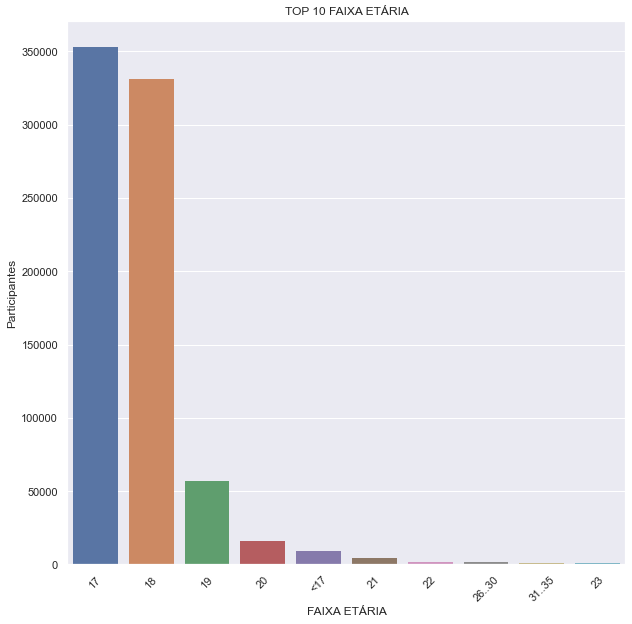

In [17]:
top_10 = base['TP_FAIXA_ETARIA'].value_counts()[:10].index
plt.figure(figsize = (10, 10))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'TP_FAIXA_ETARIA', order = top_10, data = base, linewidth = 0)
plt.title('TOP 10 FAIXA ETÁRIA')
plt.ylabel('Participantes')
plt.xlabel('FAIXA ETÁRIA')
plt.xticks(rotation = 45)
plt.show()

In [11]:
#ESCOLA
base.groupby('TP_ESCOLA').size()

TP_ESCOLA
PRIVADA    167911
PUBLICA    612295
dtype: int64

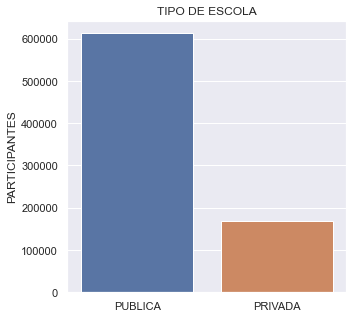

In [12]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'TP_ESCOLA', data = base)
plt.title('TIPO DE ESCOLA')
plt.ylabel('PARTICIPANTES')
plt.xlabel('')
plt.show()

In [13]:
#RENDA_FAM
base.groupby('RENDA_FAM').size()

RENDA_FAM
A     40999
B    194609
C    115078
D     94108
E     50823
F     59293
G     51725
H     41761
I     26230
J     16242
K     12969
L     11072
M     16620
N     10340
O     11703
P     11720
Q     14914
dtype: int64

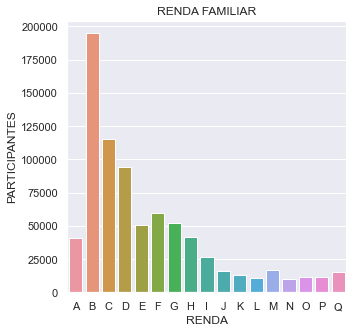

In [35]:
top_renda = base.groupby('RENDA_FAM').size().index
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'RENDA_FAM', order = top_renda, data = base)
plt.title('RENDA FAMILIAR')
plt.ylabel('PARTICIPANTES')
plt.xlabel('RENDA')
plt.show()

In [15]:
#COMPUTADOR
base.groupby('COMPUTADOR').size()

COMPUTADOR
NAO    308287
SIM    471919
dtype: int64

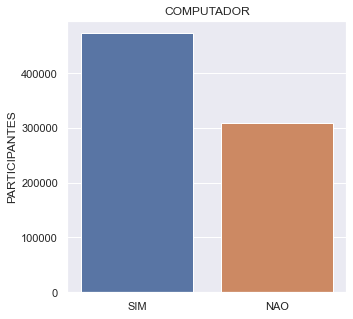

In [16]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'COMPUTADOR', data = base)
plt.title('COMPUTADOR')
plt.ylabel('PARTICIPANTES')
plt.xlabel('')
plt.show()

In [17]:
#INTERNET
base.groupby('INTERNET').size()

INTERNET
NAO     63431
SIM    716775
dtype: int64

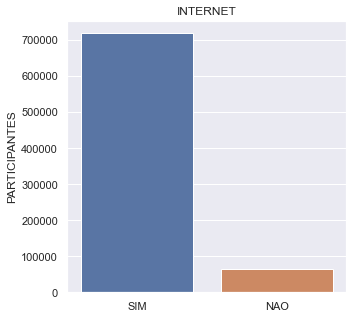

In [18]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'INTERNET', data = base)
plt.title('INTERNET')
plt.ylabel('PARTICIPANTES')
plt.xlabel('')
plt.show()

In [19]:
#NOTA
base.groupby('NOTA').size()

NOTA
alta      29026
baixa    310848
média    440332
dtype: int64

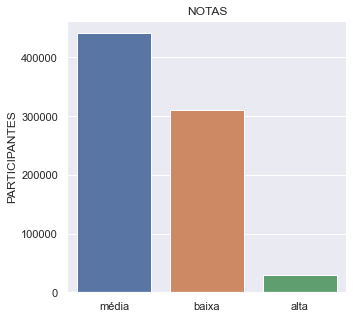

In [20]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'NOTA', data = base)
plt.title('NOTAS')
plt.ylabel('PARTICIPANTES')
plt.xlabel('')
plt.show()

In [21]:
#NOTA X FAIXA ETÁRIA
base.groupby(['TP_FAIXA_ETARIA', 'NOTA']).size().reset_index()

,TP_FAIXA_ETARIA,NOTA,0
0,17,alta,16435
1,17,baixa,116755
2,17,média,220017
3,18,alta,11095
4,18,baixa,136946
5,18,média,183440
6,19,alta,936
7,19,baixa,32970
8,19,média,23015
9,20,alta,183


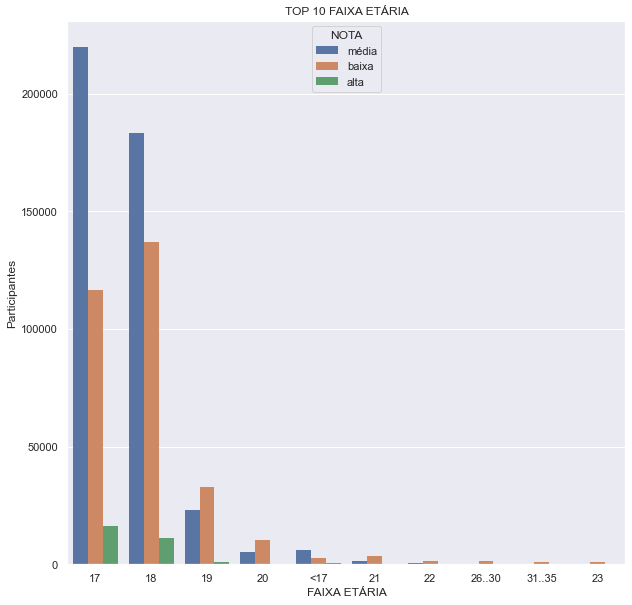

In [22]:
plt.figure(figsize = (10, 10))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'TP_FAIXA_ETARIA', hue = 'NOTA', order = top_10, data = base, linewidth = 0)
plt.title('TOP 10 FAIXA ETÁRIA')
plt.ylabel('Participantes')
plt.xlabel('FAIXA ETÁRIA')
plt.show()

In [23]:
#NOTA X ESCOLA 
base.groupby(['TP_ESCOLA', 'NOTA']).size().reset_index()

,TP_ESCOLA,NOTA,0
0,PRIVADA,alta,20366
1,PRIVADA,baixa,19703
2,PRIVADA,média,127842
3,PUBLICA,alta,8660
4,PUBLICA,baixa,291145
5,PUBLICA,média,312490


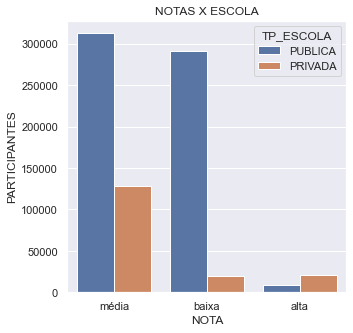

In [24]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'NOTA', hue = 'TP_ESCOLA', data = base)
plt.title('NOTAS X ESCOLA')
plt.ylabel('PARTICIPANTES')
plt.xlabel('NOTA')
plt.show()

In [25]:
x = 20366*100/167911
y = 8660*100/612295
print(f'{x:,.2f} por cento dos participantes de escola PRIVADA conseguiram nota alta.')
print(f'{y:,.2f} por cento dos participantes de escola PÚBLICA conseguiram nota alta.')

12.13 por cento dos participantes de escola PRIVADA conseguiram nota alta.
1.41 por cento dos participantes de escola PÚBLICA conseguiram nota alta.


In [26]:
#NOTA X RENDA_FAM
base.groupby(['RENDA_FAM', 'NOTA']).size().reset_index()

,RENDA_FAM,NOTA,0
0,A,alta,113
1,A,baixa,29250
2,A,média,11636
3,B,alta,822
4,B,baixa,118660
5,B,média,75127
6,C,alta,1015
7,C,baixa,54162
8,C,média,59901
9,D,alta,1277


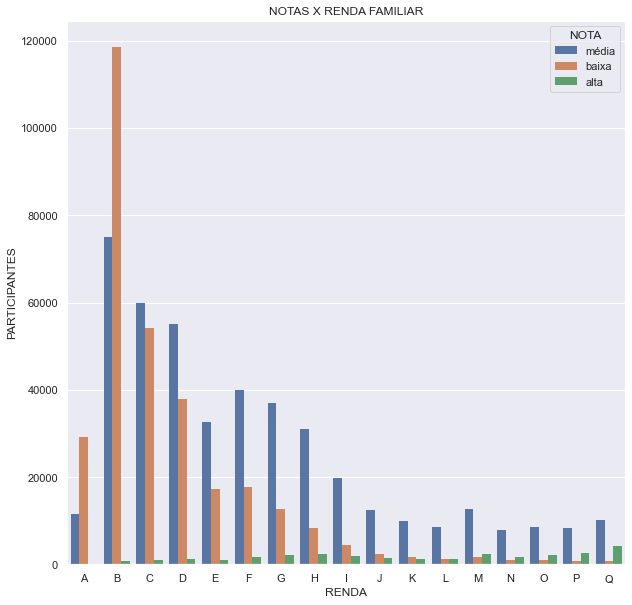

In [27]:
plt.figure(figsize = (10, 10))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'RENDA_FAM', hue = 'NOTA', order = top_renda, data = base, linewidth = 0)
plt.title('NOTAS X RENDA FAMILIAR')
plt.ylabel('PARTICIPANTES')
plt.xlabel('RENDA')
plt.show()

In [28]:
x = 822*100/194609
y = 4080*100/14914
print(f'{x:,.2f} por cento dos participantes que possuem renda ATÉ R$1.100,00 conseguiram nota alta.')
print(f'{y:,.2f} por cento dos participantes que possuem renda ACIMA DE R$22.000,00 conseguiram nota alta.')

0.42 por cento dos participantes que possuem renda ATÉ R$1.100,00 conseguiram nota alta.
27.36 por cento dos participantes que possuem renda ACIMA DE R$22.000,00 conseguiram nota alta.


In [29]:
#NOTA X COMPUTADOR
base.groupby(['COMPUTADOR', 'NOTA']).size().reset_index()

,COMPUTADOR,NOTA,0
0,NAO,alta,1234
1,NAO,baixa,184873
2,NAO,média,122180
3,SIM,alta,27792
4,SIM,baixa,125975
5,SIM,média,318152


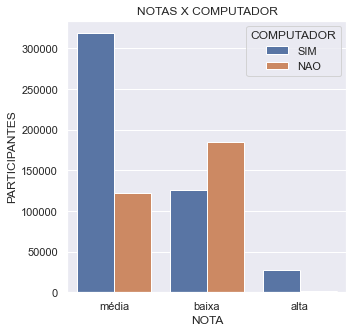

In [30]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'NOTA', hue = 'COMPUTADOR', data = base)
plt.title('NOTAS X COMPUTADOR')
plt.ylabel('PARTICIPANTES')
plt.xlabel('NOTA')
plt.show()

In [31]:
x = 1234*100/308287
y = 27792*100/471919
print(f'{x:,.2f} por cento dos participantes que NÃO possuem computador conseguiram nota alta.')
print(f'{y:,.2f} por cento dos participantes que POSSUEM computador conseguiram nota alta.')

0.40 por cento dos participantes que NÃO possuem computador conseguiram nota alta.
5.89 por cento dos participantes que POSSUEM computador conseguiram nota alta.


In [32]:
#NOTA X INTERNET
base.groupby(['INTERNET', 'NOTA']).size().reset_index()

,INTERNET,NOTA,0
0,NAO,alta,131
1,NAO,baixa,44425
2,NAO,média,18875
3,SIM,alta,28895
4,SIM,baixa,266423
5,SIM,média,421457


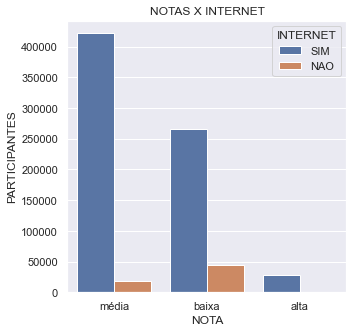

In [33]:
plt.figure(figsize = (5, 5))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'NOTA', hue = 'INTERNET', data = base)
plt.title('NOTAS X INTERNET')
plt.ylabel('PARTICIPANTES')
plt.xlabel('NOTA')
plt.show()

In [34]:
x = 131*100/63431
y = 28895*100/716775
print(f'{x:,.2f} por cento dos participantes que NÃO possuem internet conseguiram nota alta.')
print(f'{y:,.2f} por cento dos participantes que POSSUEM internet conseguiram nota alta.')

0.21 por cento dos participantes que NÃO possuem internet conseguiram nota alta.
4.03 por cento dos participantes que POSSUEM internet conseguiram nota alta.
